In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv("C:/Users/LENOVO/Desktop/train.csv")

In [3]:
raw_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [4]:
data  =  raw_data.copy()
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
from sklearn import preprocessing
data_dummies = data.copy()
data_dummies = pd.get_dummies(data['Vehicle_Age'], drop_first=False)
data_dummies

,1-2 Year,< 1 Year,> 2 Years
0,True,False,False
1,False,False,True
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
11504793,True,False,False
11504794,False,True,False
11504795,False,True,False
11504796,True,False,False


In [6]:
data = pd.concat([data, data_dummies], axis=1)
data=data.drop(['Vehicle_Age'],axis=1)
data = data[data['Age'] >= 18]

In [7]:
cols = data.columns

C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

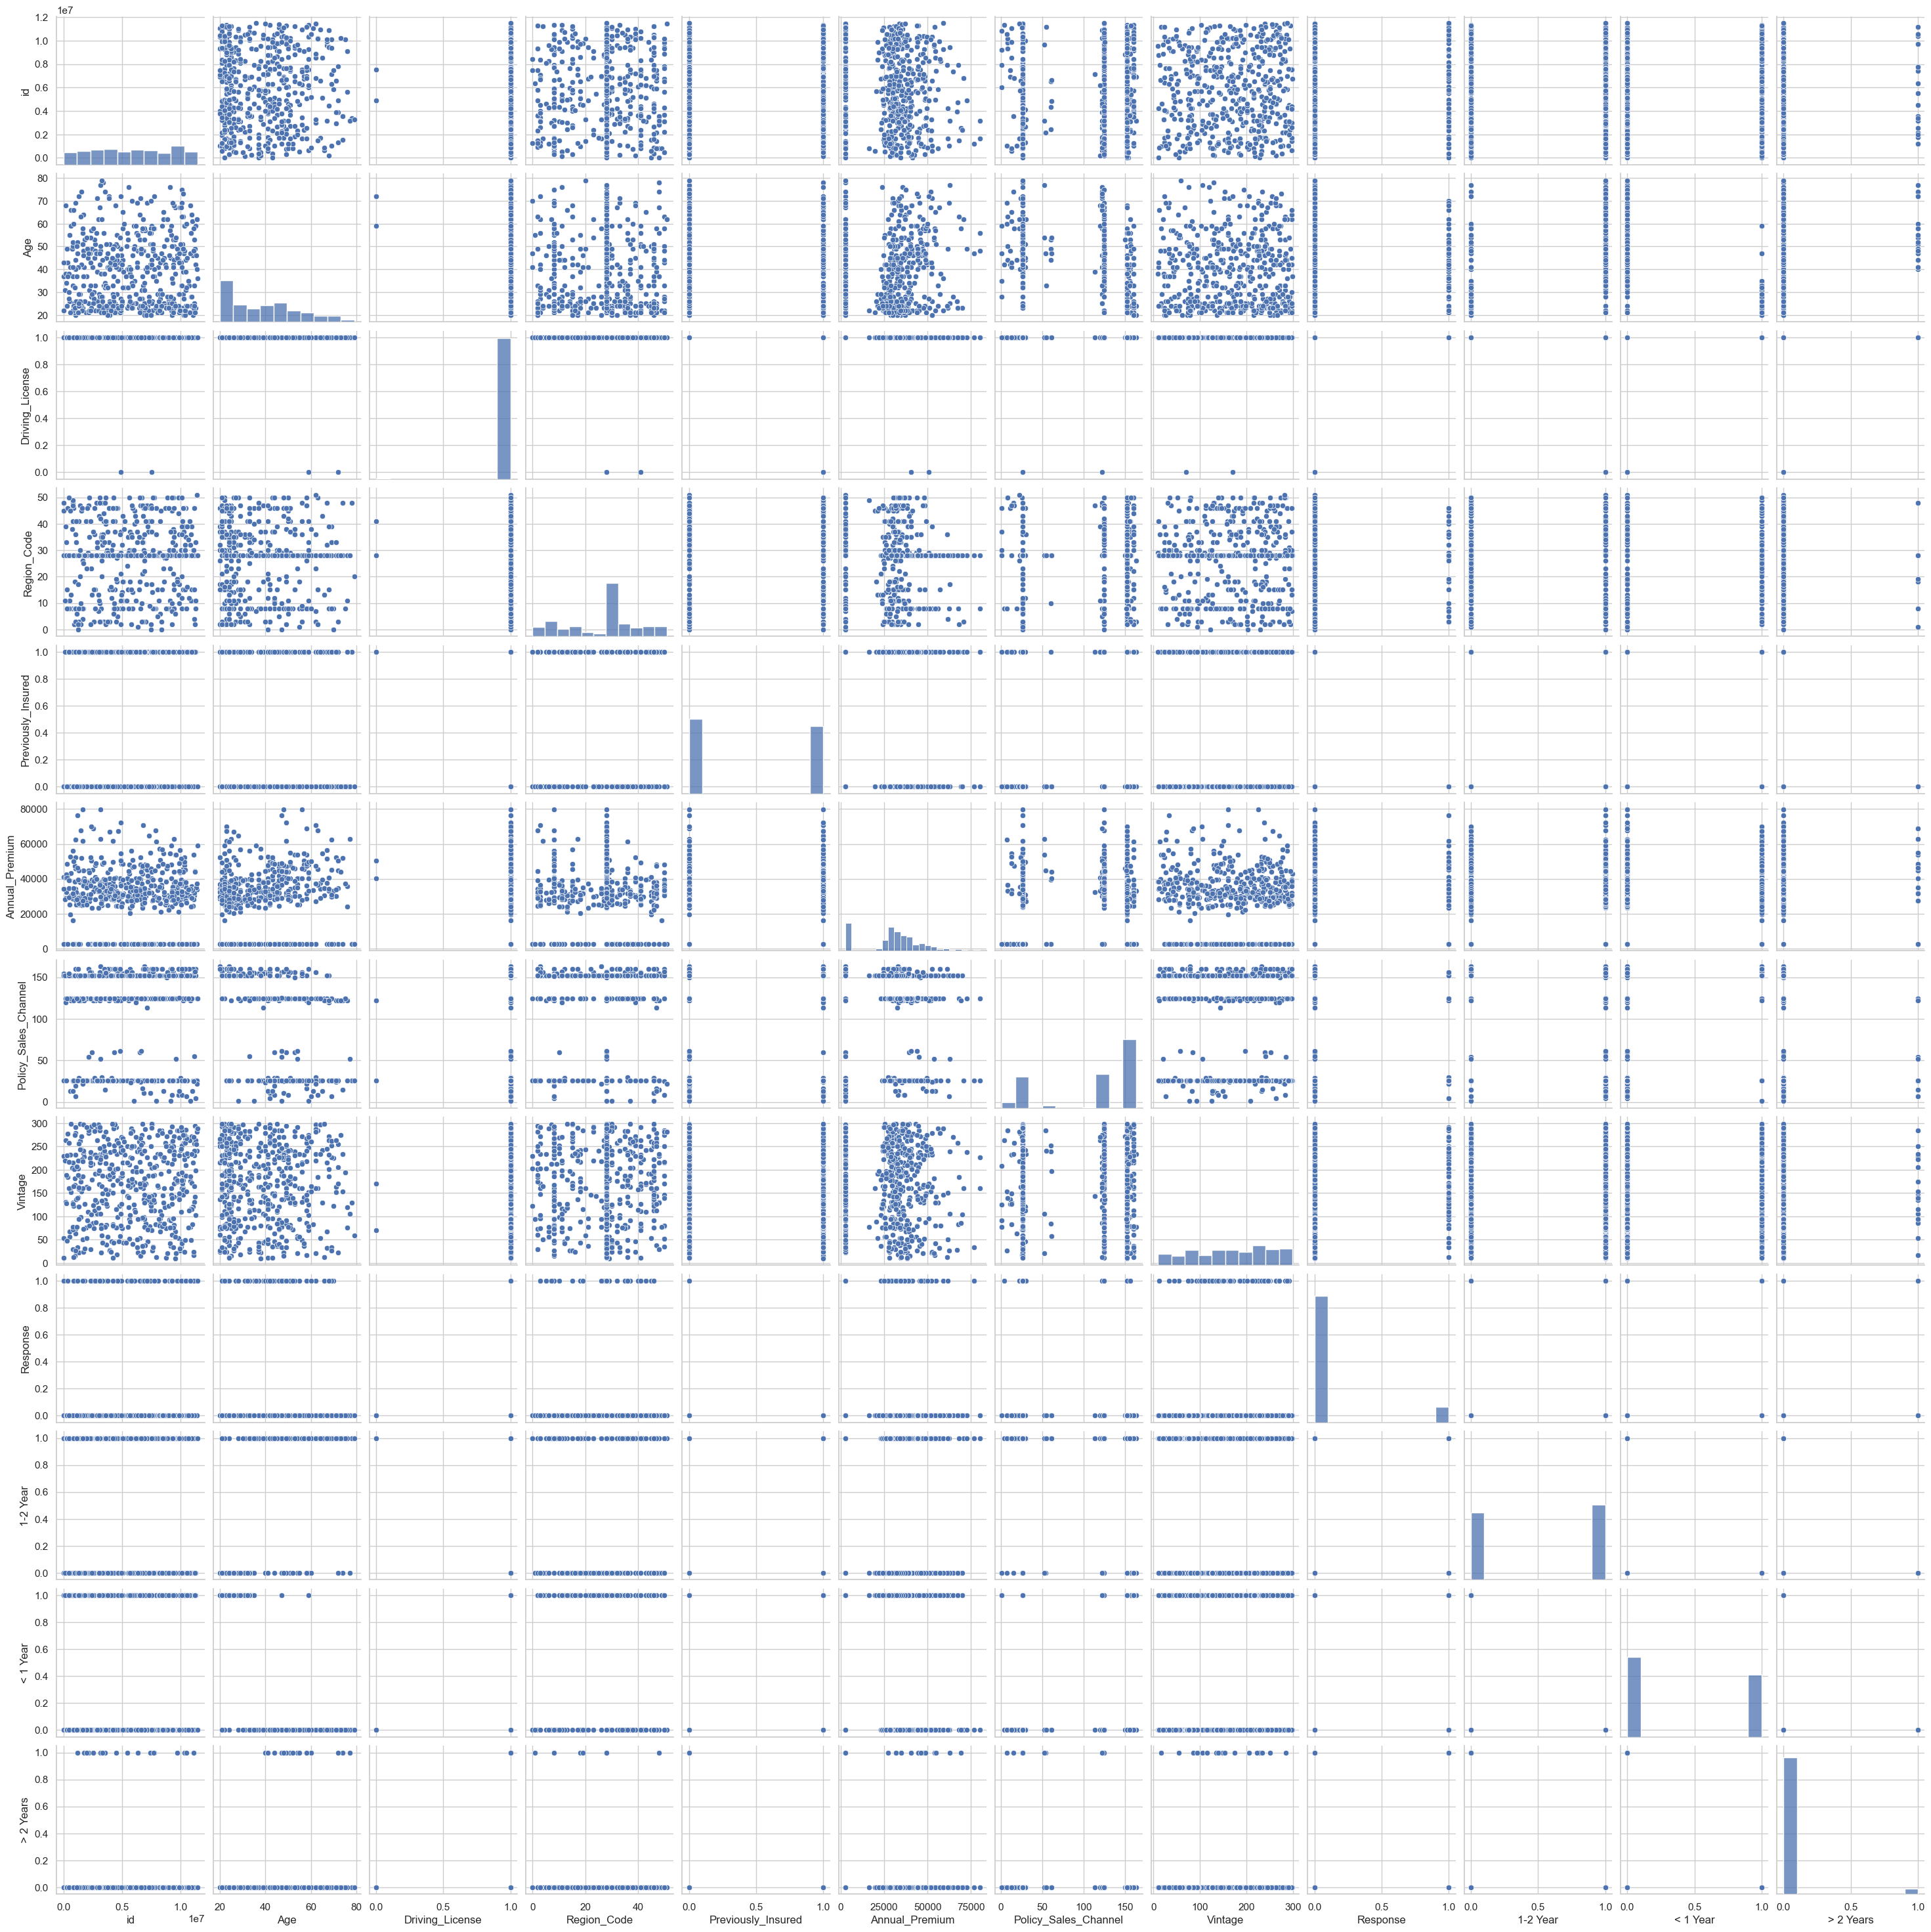

In [8]:
sns.set(style='whitegrid')
sns.pairplot(
    data.sample(500)
)

C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


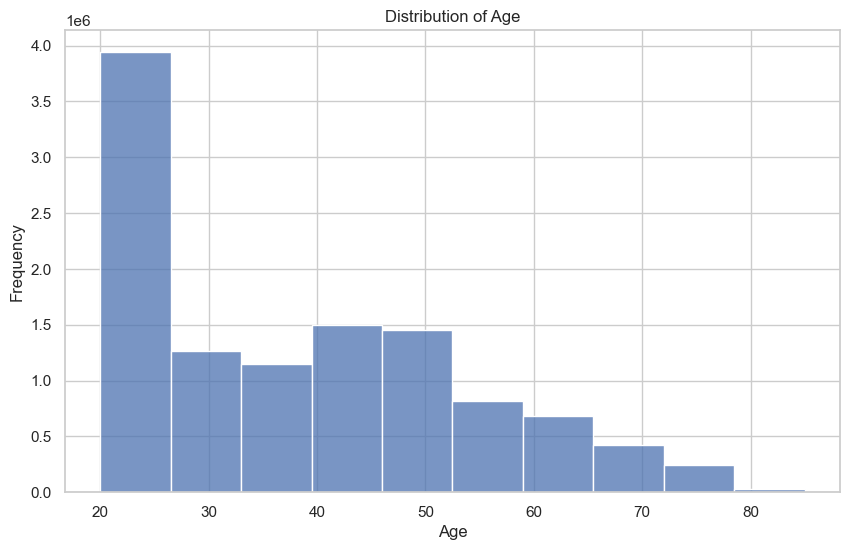

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


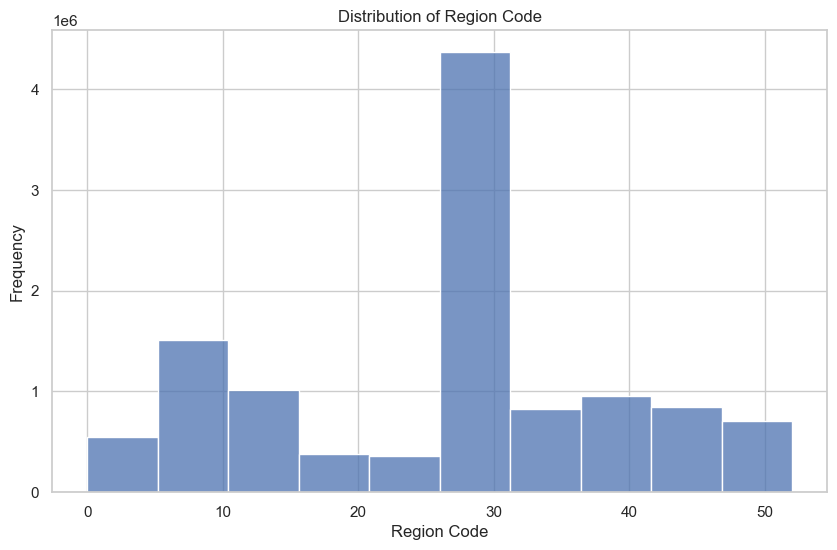

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Region_Code'], kde=False, bins=10)
plt.title('Distribution of Region Code')
plt.xlabel('Region Code')
plt.ylabel('Frequency')
plt.show()

In [11]:
data['< 1 Year'].sum()

5044145

In [12]:
data['> 2 Years'].sum()

477975

C:\Users\LENOVO\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


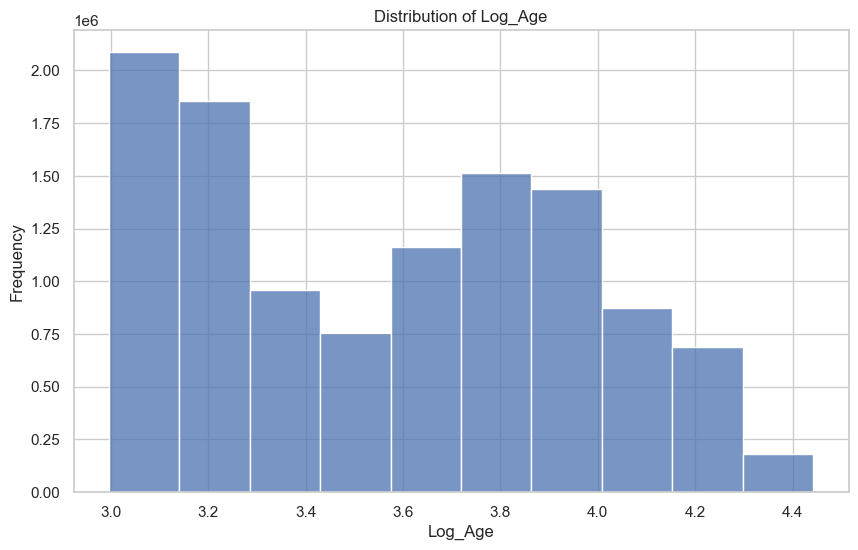

In [13]:
data['Log_Age'] = np.log(data['Age'])
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Age'], kde=False, bins=10)
plt.title('Distribution of Log_Age')
plt.xlabel('Log_Age')
plt.ylabel('Frequency')
plt.show()

In [14]:
data['Age'] = raw_data['Age']
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Log_Age
0,0,Male,21,1,35.0,0,Yes,65101.0,124.0,187,0,True,False,False,3.044522
1,1,Male,43,1,28.0,0,Yes,58911.0,26.0,288,1,False,False,True,3.761200
2,2,Female,25,1,14.0,1,No,38043.0,152.0,254,0,False,True,False,3.218876
3,3,Female,35,1,1.0,0,Yes,2630.0,156.0,76,0,True,False,False,3.555348
4,4,Female,36,1,15.0,1,No,31951.0,152.0,294,0,True,False,False,3.583519


Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

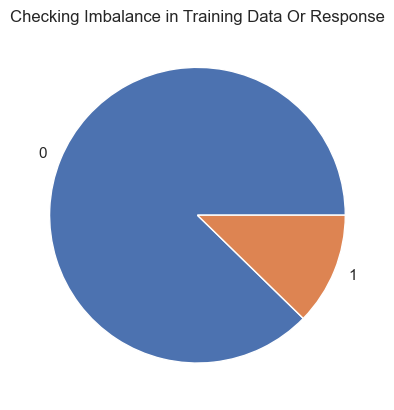

In [15]:
#Checking If training data is Imbalanced
response_data = data['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')
# clearly we can see imbalance in the data set 

In [16]:
print(cols)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', '1-2 Year', '< 1 Year',
       '> 2 Years'],
      dtype='object')


In [17]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0}).astype(np.int8)
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'Yes': 1, 'No': 0}).astype(np.int8)
data['Driving_License'] = data['Driving_License'].astype(np.int8)
data['Region_Code'] = data['Region_Code'].astype(np.int16)
data['Previously_Insured'] = data['Previously_Insured'].astype(np.int8)
data['Annual_Premium'] = data['Annual_Premium'].astype(np.float32)
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].astype(np.int16)
data['Vintage'] = data['Vintage'].astype(np.int16)
data['Response'] = data['Response'].astype(np.int8)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Year,< 1 Year,> 2 Years,Log_Age
0,0,1,21,1,35,0,1,65101.0,124,187,0,True,False,False,3.044522
1,1,1,43,1,28,0,1,58911.0,26,288,1,False,False,True,3.761200
2,2,0,25,1,14,1,0,38043.0,152,254,0,False,True,False,3.218876
3,3,0,35,1,1,0,1,2630.0,156,76,0,True,False,False,3.555348
4,4,0,36,1,15,1,0,31951.0,152,294,0,True,False,False,3.583519


In [18]:
from imblearn.combine import SMOTEENN

In [19]:
smoteenn = SMOTEENN()
X_train = data[['id', 'Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', '1-2 Year', '< 1 Year','> 2 Years']]
y_train = data['Response']

X_test = data[['id', 'Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Damage', 'Annual_Premium','Policy_Sales_Channel', 'Vintage', '1-2 Year', '< 1 Year','> 2 Years']]

In [20]:
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smoteenn.value_counts())

Response
0    10089739
1     1415059
Name: count, dtype: int64

Response
1    6930488
0    4801545
Name: count, dtype: int64


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smoteenn)
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-1.73205066,  0.92045115, -1.15940989, ..., -0.88359973,
        -0.2081984 , -1.37792285],
       [-1.73205036,  0.92045115,  0.30789673, ..., -0.88359973,
         4.80311086,  0.48929553],
       [-1.73205005, -1.08642376, -0.89262687, ...,  1.13173417,
        -0.2081984 , -0.92366585],
       ...,
       [ 1.73205005, -1.08642376, -0.62584385, ...,  1.13173417,
        -0.2081984 , -0.5369752 ],
       [ 1.73205036, -1.08642376,  0.84146277, ..., -0.88359973,
        -0.2081984 ,  0.93384001],
       [ 1.73205066,  0.92045115, -0.89262687, ...,  1.13173417,
        -0.2081984 , -0.92366585]])

In [22]:
# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smoteenn, test_size=0.3, random_state=42)

# Add a constant to the model (intercept)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# Fit the logistic regression model
reg_logit = sm.Logit(y_train, x_train)
results_logit = reg_logit.fit()

# Print summary of the model
print(results_logit.summary())


         Current function value: 0.316872
         Iterations: 35


C:\Users\LENOVO\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:              8212423
Model:                          Logit   Df Residuals:                  8212410
Method:                           MLE   Df Model:                           12
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                  0.5316
Time:                        14:53:33   Log-Likelihood:            -2.6023e+06
converged:                      False   LL-Null:                   -5.5562e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7249     34.504      0.108      0.914     -63.902      71.352
x1             0.0026      0.001      2.394      0.017       0.000       0.005
x2            -0.3323      0.001   -305.750      0.0